# Assessment of Data and Applying Normalization

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
# Preliminary loading of libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

<h2> Loading the dataset and exploring the features</h2>

In [171]:
# Loading dataset
csv_file_path = "abalone.csv"
abalone = pd.read_csv(csv_file_path, sep=',')

# Adding the Columns/Features
column_names = ['Sex','Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone.columns = column_names

In [172]:
abalone.head(7)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16


In [173]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [174]:
abalone.shape

(4176, 9)

In [175]:
abalone.describe() 

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


<Figure size 432x432 with 0 Axes>

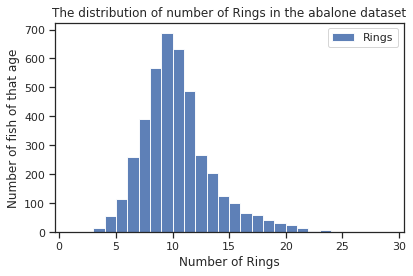

In [176]:
# Plotting histogram of number of fish with each number of Rings

plt.figure(figsize=(6,6))
output_col = 'Rings'
num_of_bins = abalone[output_col].nunique()
abalone_hist = abalone.hist(column = output_col, bins = num_of_bins, alpha = 0.9, label = output_col)

plt.title('The distribution of number of Rings in the abalone dataset')
plt.xlabel('Number of Rings')
plt.ylabel('Number of fish of that age')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()

The number of fish having 9 rings is the maximum. 

<h2> Checking for missing Data</h2> 

In [177]:
abalone.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [178]:
abalone.isnull().values.any()

False

In [179]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

There are no missing values in the dataset.

<h2> Checking if this is a balanced dataset</h2>

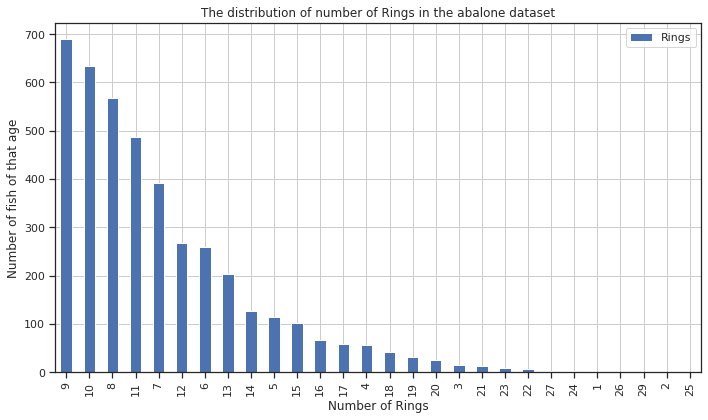

In [182]:
plt.figure(figsize=(10, 6))
abalone['Rings'].value_counts().plot(kind = 'bar')

plt.title('The distribution of number of Rings in the abalone dataset')
plt.xlabel('Number of Rings')
plt.ylabel('Number of fish of that age')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()

It is observed that the data is not balanced. There are as large in number as 689 number of samples for 9 Rings and as low as 1 for 29 rings. 

<h2> Computing summarization statistics</h2>

In [186]:
# Finding number of distinct values for each feature 

for col in abalone.columns:
    print(" There are {} distinct values of {} feature.".format(abalone[col].nunique(), col))

 There are 3 distinct values of Sex feature.
 There are 134 distinct values of Length feature.
 There are 111 distinct values of Diameter feature.
 There are 51 distinct values of Height feature.
 There are 2429 distinct values of Whole weight feature.
 There are 1515 distinct values of Shucked weight feature.
 There are 880 distinct values of Viscera weight feature.
 There are 926 distinct values of Shell weight feature.
 There are 28 distinct values of Rings feature.


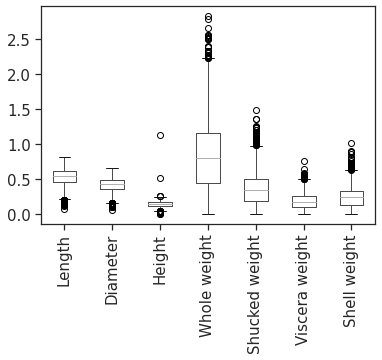

In [188]:
# Plotting the values of all columns using boxplot 

abalone = abalone.drop(columns=['Sex', 'Rings'])
pd.plotting.boxplot(abalone, grid=False, rot=90, fontsize=15)

It is seen that the range of values is very big for 'Whole weight' and 'Shucked weight' as compared to other features.

In [163]:
# Finding the datatypes of the features

abalone.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
dtype: object

In [189]:
# Finding the moments - Mean, Variance, Minimum and Maximum of the features

abalone.agg([np.mean, np.var, min, max]).T

,mean,var,min,max
Length,0.524009,0.014425,0.0750,0.8150
Diameter,0.407892,0.009850,0.0550,0.6500
Height,0.139527,0.001749,0.0000,1.1300
Whole weight,0.828818,0.240515,0.0020,2.8255
Shucked weight,0.359400,0.049275,0.0010,1.4880
Viscera weight,0.180613,0.012017,0.0005,0.7600
Shell weight,0.238852,0.019380,0.0015,1.0050


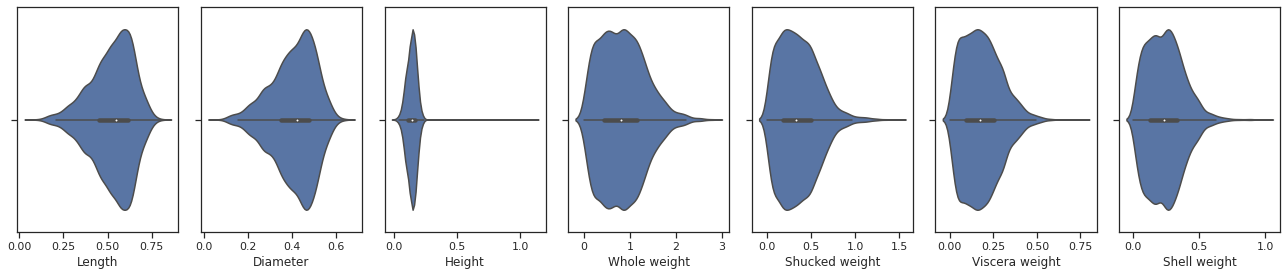

In [190]:
# Skew of features

fig = plt.figure(figsize=(18, 4))
gs = fig.add_gridspec(1, 7)

ax = fig.add_subplot(gs[0, 0])
sns.violinplot('Length', data=abalone)
ax.set_xlabel("Length")

ax = fig.add_subplot(gs[0, 1])
sns.violinplot('Diameter', data=abalone)
ax.set_xlabel("Diameter")

ax = fig.add_subplot(gs[0, 2])
sns.violinplot('Height', data=abalone)
ax.set_xlabel("Height")

ax = fig.add_subplot(gs[0, 3])
sns.violinplot('Whole weight', data=abalone)
ax.set_xlabel("Whole weight")

ax = fig.add_subplot(gs[0, 4])
sns.violinplot("Shucked weight", data=abalone)
ax.set_xlabel("Shucked weight")

ax = fig.add_subplot(gs[0, 5])
sns.violinplot("Viscera weight", data=abalone)
ax.set_xlabel("Viscera weight")

ax = fig.add_subplot(gs[0, 6])
sns.violinplot("Shell weight", data=abalone)
ax.set_xlabel("Shell weight")

fig.tight_layout()
plt.show()

The skew is positive for all variables except for 'Length' and 'Diameter' for which it is neagative.

<h2> Checking for Outliers</h2>

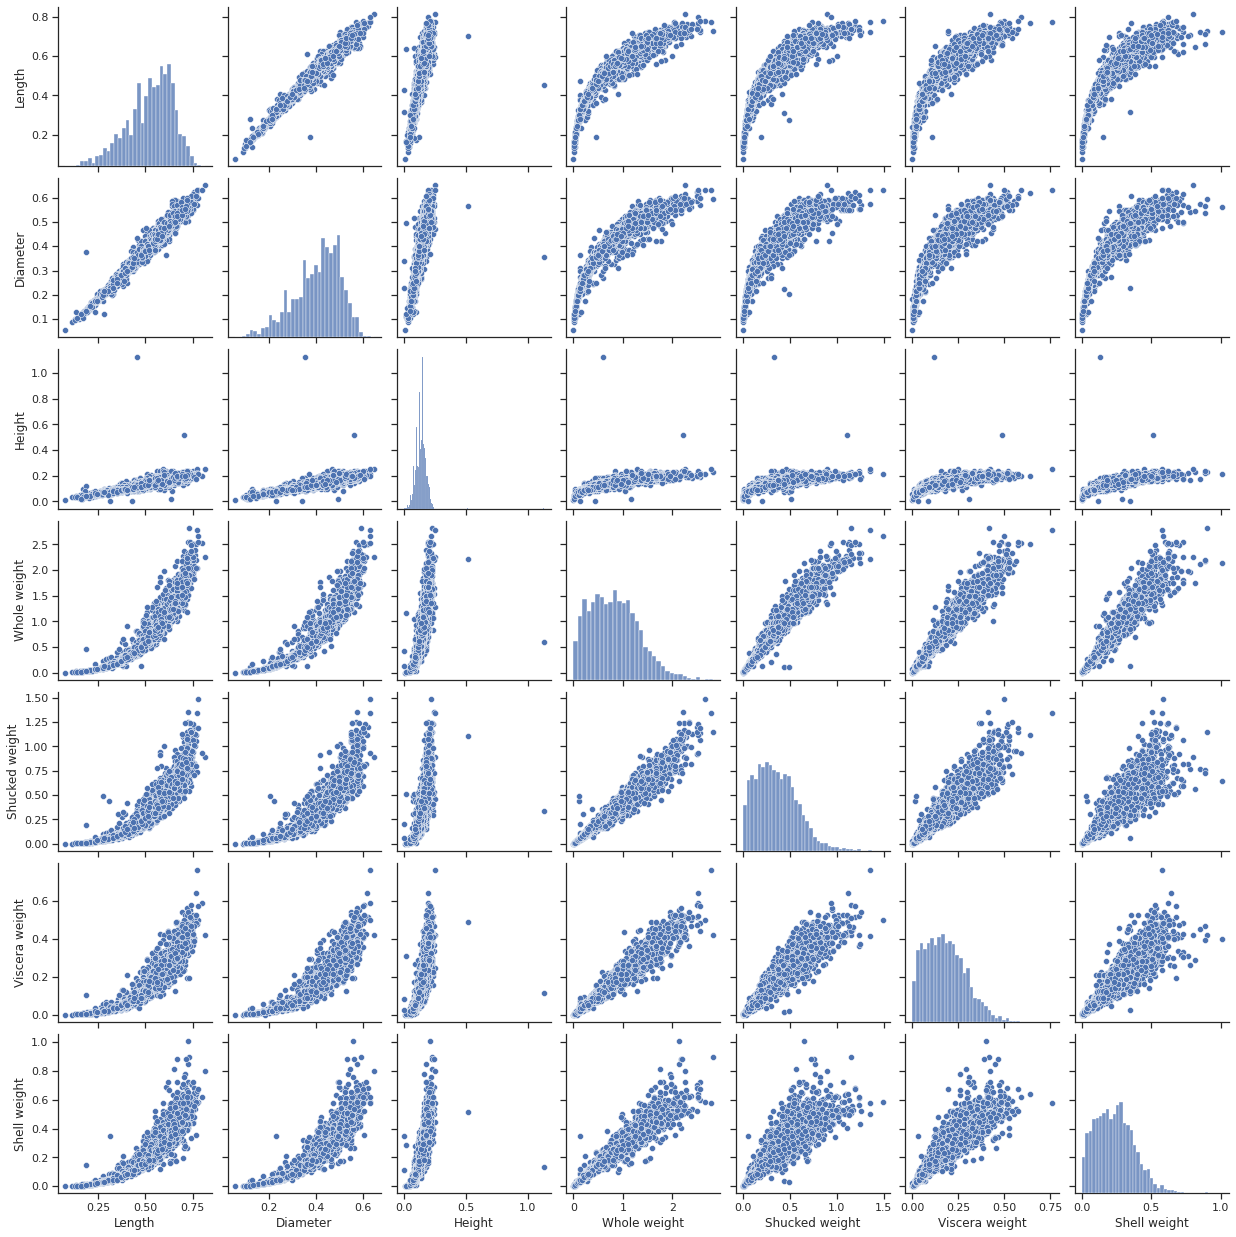

In [192]:
# fig = pd.plotting.scatter_matrix(abalone, alpha=0.2, figsize=(20,20))
sns.pairplot(abalone, vars = abalone.columns)

By observing the scatterplot of all the data, there are a small number of outliers present. The Height feature has few remarkable outliers as compared to other dimensions.

From the summaries above, it is observed that there are outliers in some variables such as the Height which has a mean value of 0.139516 while it reaches to a max of 1.130000. This is a pretty big range and hence brings a question about the reason of this difference in the range of the Height. 

In [ ]:
abalone['Height'].describe()  

count    4176.000000
mean        0.139527
std         0.041826
min         0.000000
25%         0.115000
50%         0.140000
75%         0.165000
max         1.130000
Name: Height, dtype: float64

Using Histogram with different window sizes,  checking if there are any bars that get separated by a very large margin from most of the dataset. 


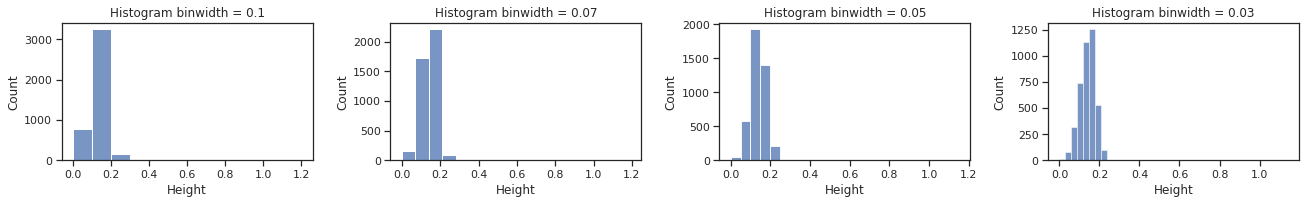

In [68]:
# Checking for outliers in 'Height'

fig = plt.figure(figsize=(32, 3))
gs = fig.add_gridspec(1, 7)

ax = fig.add_subplot(gs[0, 0])
sns.histplot(data = abalone, x = "Height", binwidth=0.1)
ax.set_xlabel("Height")
ax.set_title("Histogram binwidth = 0.1")

ax = fig.add_subplot(gs[0, 1])
sns.histplot(data = abalone, x = "Height", binwidth=0.07)
ax.set_xlabel("Height")
ax.set_title("Histogram binwidth = 0.07")

ax = fig.add_subplot(gs[0, 2])
sns.histplot(data = abalone, x = "Height", binwidth=0.05)
ax.set_xlabel("Height")
ax.set_title("Histogram binwidth = 0.05")

ax = fig.add_subplot(gs[0, 3])
sns.histplot(data = abalone, x = "Height", binwidth=0.03)
ax.set_xlabel("Height")
ax.set_title("Histogram binwidth = 0.03")

fig.tight_layout()
plt.show()

In [82]:
abalone[abalone['Height'] > 0.25]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1416,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10
2050,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8


These above two heights can be outliers as they are far higher than the remaining dataset range of heights.


Similarly, for the feature 'Viscera weight' the mean in as low as 0.18 and the max is 0.76.

In [ ]:
abalone['Viscera weight'].describe()

count    4176.000000
mean        0.180613
std         0.109620
min         0.000500
25%         0.093375
50%         0.171000
75%         0.253000
max         0.760000
Name: Viscera weight, dtype: float64

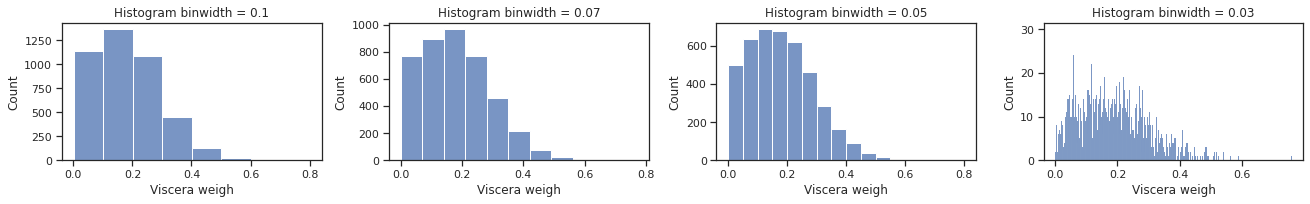

In [134]:
# Checking for outliers in 'Viscera weight'

fig = plt.figure(figsize=(32, 3))
gs = fig.add_gridspec(1, 7)

ax = fig.add_subplot(gs[0, 0])
sns.histplot(data = abalone, x = "Viscera weight", binwidth=0.1)
ax.set_xlabel("Viscera weight")
ax.set_title("Histogram binwidth = 0.1")

ax = fig.add_subplot(gs[0, 1])
sns.histplot(data = abalone, x = "Viscera weight", binwidth=0.07)
ax.set_xlabel("Viscera weight")
ax.set_title("Histogram binwidth = 0.07")

ax = fig.add_subplot(gs[0, 2])
sns.histplot(data = abalone, x = "Viscera weight", binwidth=0.05)
ax.set_xlabel("Viscera weight")
ax.set_title("Histogram binwidth = 0.05")

ax = fig.add_subplot(gs[0, 3])
sns.histplot(data = abalone, x = "Viscera weight", binwidth=0.001)
ax.set_xlabel("Viscera weight")
ax.set_title("Histogram binwidth = 0.001")

fig.tight_layout()
plt.show()

In [84]:
abalone[abalone['Viscera weight']> 0.60000]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1761,M,0.770,0.62,0.195,2.5155,1.1155,0.6415,0.642,12
1762,M,0.775,0.63,0.250,2.7795,1.3485,0.7600,0.578,12


These above two Viscera weights can similarly be guessed as outliers and do not seem to be naturally occuring. They might be due to a mistake in the data insertion. 

<h2> Normalization</h2>

<h4> Looking at the observations made above, normalization may not make substantial difference here. The range of the feature values is not largely different. However, the variable 'Whole Weight' is very much large than the rest of the features. 
So the features can still be normalized.
</h4>

In [94]:
from scipy import stats

Applying Z-score normalization and comaring normalized and unnormalized plot for two of the all features

In [206]:
abalone_unnormalized = abalone
abalone_normalized = abalone_unnormalized.apply(stats.zscore)

col_a = 'Height'
col_b = 'Viscera weight'

abalone_UN_columns= abalone_unnormalized[[col_a, col_b]]
abalone_N_columns = abalone_normalized[[col_a, col_b]]

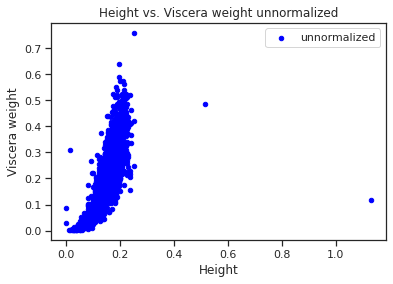

In [207]:
# Plotting the unnormalized data

ax = plt.gca(title='{} vs. {} unnormalized'.format(col_a,col_b) , xlabel=col_a, ylabel=col_b)

abalone_UN_columns.plot(kind='scatter',x=col_a, y=col_b,color='blue', label='unnormalized', ax = ax)

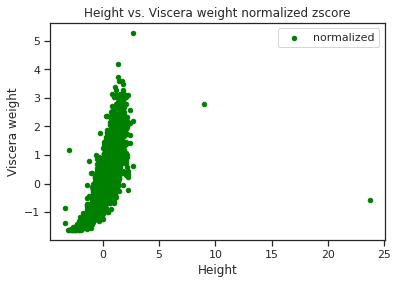

In [209]:
# Plotting the normalized data

bx = plt.gca(title='{} vs. {} normalized zscore'.format(col_a,col_b) , xlabel=col_a, ylabel=col_b)

abalone_N_columns.plot(kind='scatter',x=col_a, y=col_b,color='green', label='normalized', ax = bx)

From the above plots, it is observed that the shapes are same but the scale of the plot is changed.